In [2]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = scipy.io.loadmat('data.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x_train', 'y_train', 'z_train', 'x_test', 'y_test', 'z_test'])

In [24]:
x_train = np.array(data['x_train'][:,0])
y_train = np.array(data['y_train'][:,0])
z_train = np.array(data['z_train'][:,0])
x_test = np.array(data['x_test'][:,0])
y_test = np.array(data['y_test'][:,0])
z_test = np.array(data['z_test'][:,0])

In [35]:
a = 1
b = 1
c = 1
alpha = 1
params = np.array([1,1,1,1])
params
a_array = [1]
b_array = [1]
c_array = [1]
alpha_array = [1]

In [36]:
A = list(np.log(x_train+alpha))
B = list(np.log(y_train))
C = 1
Alpha = list(a/(x_train+alpha))
data = {"A":A,"B":B,"C":C,"Alpha":Alpha}
df = pd.DataFrame.from_dict(data)

In [37]:
df.head()

,A,B,C,Alpha
0,-1.265860,2.197654,1,3.546143
1,0.530757,1.845370,1,0.588160
2,-1.683529,1.171040,1,5.384523
3,-0.590873,2.829825,1,1.805564
4,0.649101,2.740714,1,0.522515


In [38]:
J = np.array(df)

In [39]:
for i in range(0,50):
    r = np.log(z_train)-np.log(c)-a*np.log(x_train+alpha)-b*np.log(y_train)
    delta = np.dot(np.linalg.inv(np.dot(np.transpose(J),J)),np.dot(np.transpose(J),r))
    params = params + delta
    alpha = params[3]
    a = params[0]
    b = params[1]
    c = params[2]
    A = np.log(x_train+alpha)
    B = np.log(y_train)
    C = 1/c
    Alpha = a/(x_train+alpha)
    data = {"A":A,"B":B,"C":C,"Alpha":Alpha}
    df = pd.DataFrame.from_dict(data)
    J = np.array(df)
    a_array.append(a)
    b_array.append(b)
    c_array.append(c)
    alpha_array.append(alpha)
    #print("a="+str(a)+" b="+str(b)+" c="+str(c)+" alpha="+str(alpha))

In [66]:
z_pred = np.exp(np.log(c)+a*np.log(x_test+alpha)+b*np.log(y_test))
params

array([1.98995865, 2.99992999, 2.03938319, 1.99001463])

In [41]:
e = (z_pred - z_test)/(z_test)*100

In [42]:
e.mean()

0.36264890894126556

In [43]:
e.std()

3.837076949953906

In [44]:
from scipy import stats

In [45]:
k2, p = stats.normaltest(e)

In [56]:
p
print(str(p)+" : Much higher than 0.05 0r 0.1 that we usually consider, hence can't reject Null hypothesis")

0.16481172765382446 : Much higher than 0.05 0r 0.1 that we usually consider, hence can't reject Null hypothesis


In [18]:
df = {"Real Values":z_test,"Predicted Values":z_pred}
df = pd.DataFrame(df)

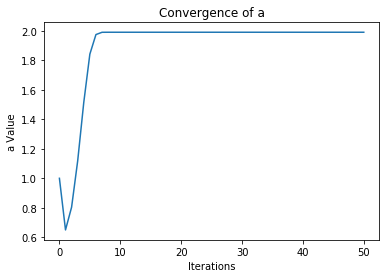

In [51]:
index_array = range(0,51)
plt.plot(index_array,a_array)
plt.xlabel("Iterations")
plt.ylabel("a Value")
plt.title("Convergence of a")
plt.show()

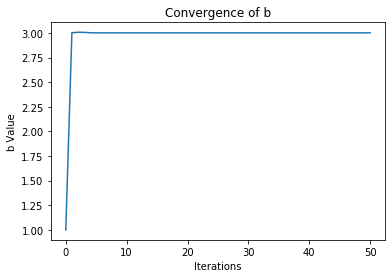

In [52]:
index_array = range(0,51)
plt.plot(index_array,b_array)
plt.xlabel("Iterations")
plt.ylabel("b Value")
plt.title("Convergence of b")
plt.show()

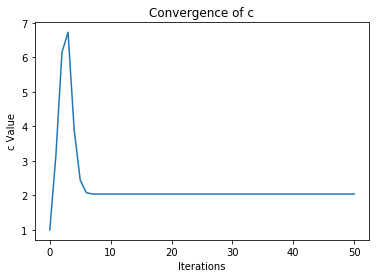

In [53]:
index_array = range(0,51)
plt.plot(index_array,c_array)
plt.xlabel("Iterations")
plt.ylabel("c Value")
plt.title("Convergence of c")
plt.show()

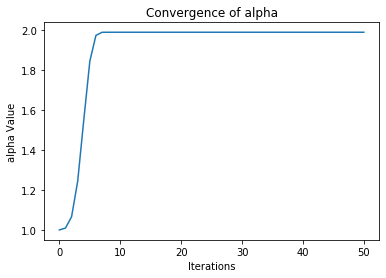

In [54]:
index_array = range(0,51)
plt.plot(index_array,alpha_array)
plt.xlabel("Iterations")
plt.ylabel("alpha Value")
plt.title("Convergence of alpha")
plt.show()

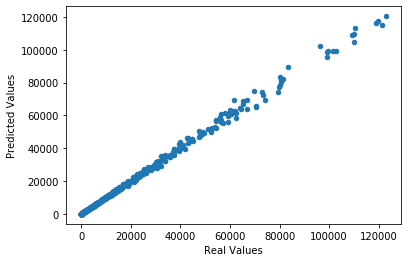

In [20]:
df.plot.scatter('Real Values','Predicted Values')

In [57]:
from scipy.optimize import least_squares

In [58]:
def fun(para,x,y,z):
    return(z-para[2]*np.exp(para[0]*(x+para[3]))*np.exp(y*para[1]))

In [73]:
res_lsq = least_squares(fun,np.ones(4),loss = "soft_l1" ,args=(x_train, y_train,z_train))

In [74]:
res_lsq

 active_mask: array([0., 0., 0., 0.])
        cost: 4176107.1558999307
         fun: array([ 2.07848876e+03,  3.37207305e+03,  7.88614146e+01,  1.03016855e+04,
        2.67988623e+04,  6.46332809e+03, -1.67147011e+04,  1.62989110e+04,
        1.26866344e+03, -1.86404050e+04,  1.39156960e+04,  1.66186458e+04,
        2.30576051e+03,  7.45824254e+02,  1.94544722e+02,  6.95903932e+03,
        2.09684113e+03,  8.93438107e+03,  3.09885686e+03,  3.74280383e+03,
        1.13019828e+03,  7.36386232e+03,  1.71400401e+03,  2.04346913e+04,
        2.63874054e+04,  1.54043561e+04,  2.50401290e+04,  2.05715818e+04,
       -2.81241196e+00,  1.12871094e+03,  1.18686324e+04,  6.62519386e+03,
        1.19307559e+03,  3.17525186e+03,  3.25840007e+04, -1.12520321e+03,
        1.99122876e+03,  8.46136853e+03,  4.98494226e+03,  9.68485371e+03,
        3.25965248e+04,  1.01714335e+04, -1.97122106e+04,  1.35424473e+02,
        5.11431862e+03,  1.13771771e+04,  9.90610393e+02,  5.32302455e+01,
        1.36082